In [1]:
#Importing the Nominatim geocoder class 
from geopy.geocoders import Nominatim
import time
from pprint import pprint
import rasterio as rio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# address we need to geocode
loc = '21 Groenplaats, 2000 Antwerpen'
 
# making an instance of Nominatim class
geolocator = Nominatim(user_agent="my_request")
 
# applying geocode method to get the location
location = geolocator.geocode(loc, timeout = 10)

# latitude
x = location.latitude
print(x)

# longitude
y = location.longitude
print(y)

51.22027995
4.4013402883307045


In [20]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:31370")
coordinates = transformer.transform(location.latitude, location.longitude)
print(coordinates)

(152276.44559004295, 212259.79616476875)


In [21]:
DSM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\DHMVIIDSMRAS1m_k15.tif'
# DTM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\DHMVIIDTMRAS1m_k15.tif'

In [22]:
DSM_file = rio.open(DSM_fp)
DSM_array = DSM_file.read(1)
DSM_array


array([[ 4.45,  4.48,  4.47, ..., 11.48, 16.04, 15.43],
       [ 5.72,  4.44,  4.53, ..., 11.51, 16.05, 20.84],
       [ 8.07,  4.47,  4.44, ..., 11.45, 16.46, 22.35],
       ...,
       [ 5.66,  5.59,  5.52, ..., 14.25, 13.04, 10.82],
       [ 5.65,  5.59,  5.52, ..., 11.31, 15.15, 12.76],
       [ 5.69,  5.64,  5.55, ..., 15.15, 10.88, 10.81]], dtype=float32)

In [25]:
ind_row, ind_col = rio.transform.TransformMethodsMixin.index(DSM_file, 152276.44559004295, 212259.79616476875) 

In [36]:
 DSM_slice = DSM_array[ind_row-55:ind_row+55,ind_col-55:ind_col+55]

(110, 110)

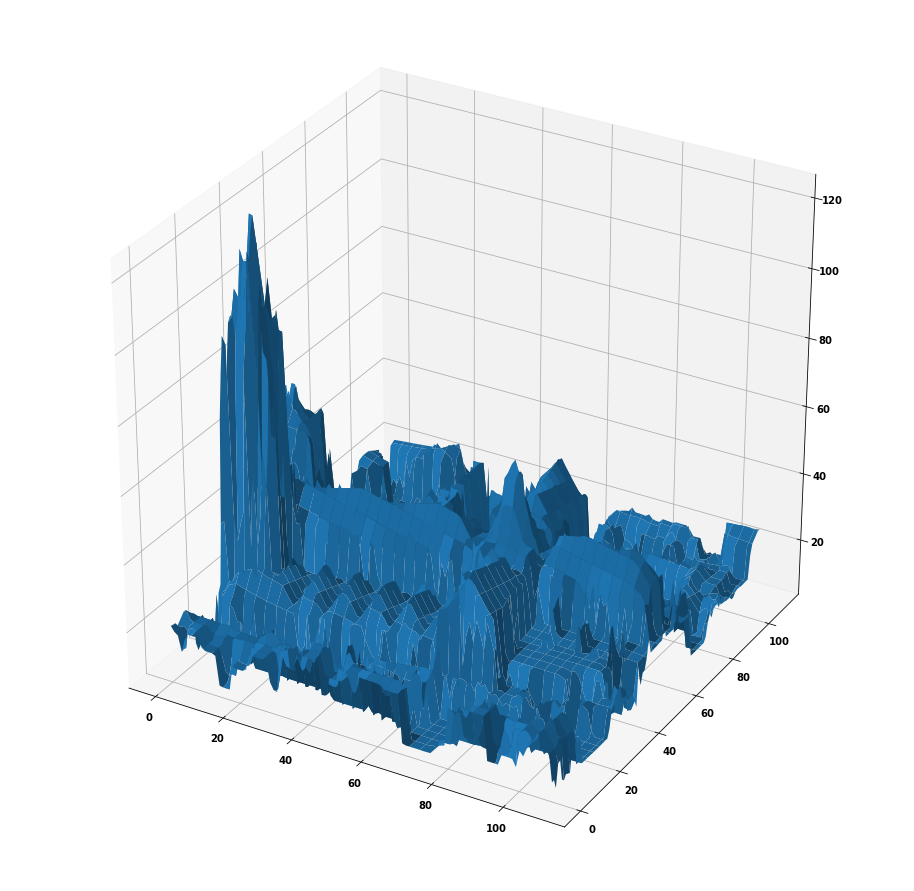

In [37]:
import matplotlib.pyplot as plt
nx = DSM_slice.shape[1]
ny = DSM_slice.shape[0]

x = range(nx)
y = range(ny)


X,Y = np.meshgrid(x,y)
hf = plt.figure(figsize=(16,16))
ha = hf.add_subplot(111,projection = '3d')

ha.plot_surface(X,Y,DSM_slice)
X.shape
Y.shape